# Female Birth

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("data/daily-total-female-births.csv")
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [3]:
df.shape

(365, 2)

<Axes: xlabel='Date', ylabel='Births'>

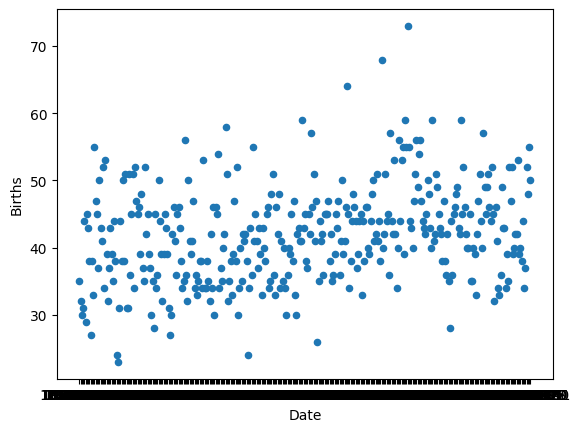

In [4]:
df.plot.scatter(x="Date", y="Births")

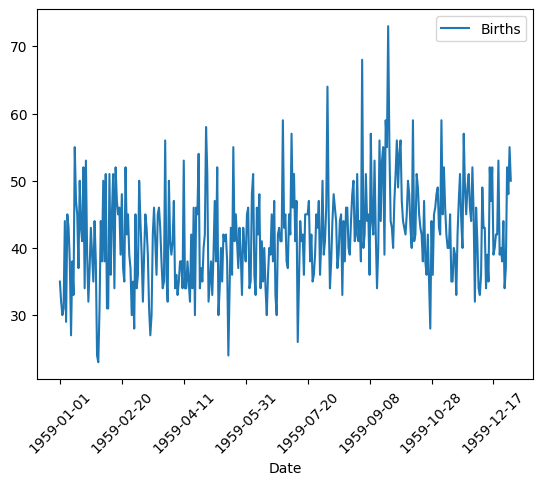

In [5]:
df.plot.line(x="Date", y="Births")
plt.xticks(rotation=45)
plt.show()

## Moving Average

In [6]:
windows = [3, 5, 10, 15]

for window in windows:
    df[f"Births W{window}"] = df["Births"].rolling(window=window).mean()

df.head(20)

,Date,Births,Births W3,Births W5,Births W10,Births W15
0,1959-01-01,35,NaN,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN,NaN
3,1959-01-04,31,31.000000,NaN,NaN,NaN
4,1959-01-05,44,35.000000,34.4,NaN,NaN
5,1959-01-06,29,34.666667,33.2,NaN,NaN
6,1959-01-07,45,39.333333,35.8,NaN,NaN
7,1959-01-08,43,39.000000,38.4,NaN,NaN
8,1959-01-09,38,42.000000,39.8,NaN,NaN
9,1959-01-10,27,36.000000,36.4,35.4,NaN


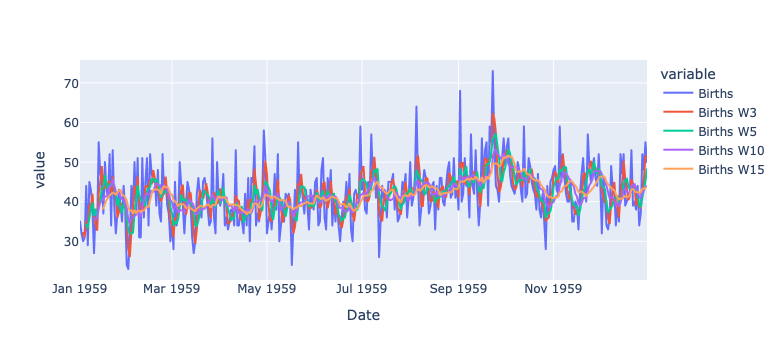

In [7]:
# df.plot.line(x="Date", y=["Births", "Births W3"])
fig = px.line(df, x="Date", y=["Births", "Births W3", "Births W5", "Births W10", "Births W15"])
fig.show()

## Lagging

In [8]:
df.head()

,Date,Births,Births W3,Births W5,Births W10,Births W15
0,1959-01-01,35,NaN,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN,NaN
3,1959-01-04,31,31.000000,NaN,NaN,NaN
4,1959-01-05,44,35.000000,34.4,NaN,NaN


In [9]:
df["Day -1"] = df["Births"].shift(1)
df["Day -2"] = df["Births"].shift(2)

df["Day Diff -1"] = df["Day -1"].diff(1)

df["Day Diff Per -1"] = df["Day Diff -1"] / df["Day -1"]
df.head()

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1
0,1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-01-02,32,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,1959-01-03,30,32.333333,NaN,NaN,NaN,32.0,35.0,-3.0,-0.093750
3,1959-01-04,31,31.000000,NaN,NaN,NaN,30.0,32.0,-2.0,-0.066667
4,1959-01-05,44,35.000000,34.4,NaN,NaN,31.0,30.0,1.0,0.032258


## Birth Distribution

array([[<Axes: title={'center': 'Births'}>]], dtype=object)

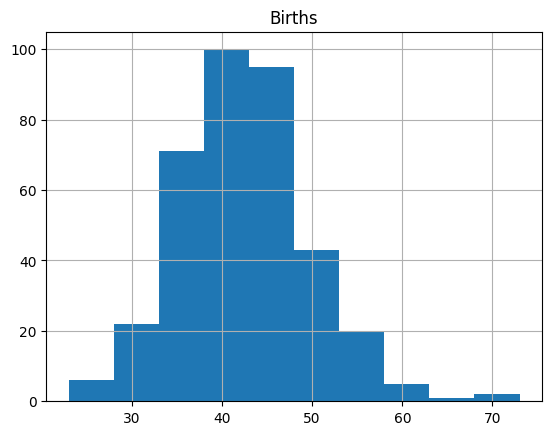

In [10]:
df.hist("Births")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             365 non-null    object 
 1   Births           365 non-null    int64  
 2   Births W3        363 non-null    float64
 3   Births W5        361 non-null    float64
 4   Births W10       356 non-null    float64
 5   Births W15       351 non-null    float64
 6   Day -1           364 non-null    float64
 7   Day -2           363 non-null    float64
 8   Day Diff -1      363 non-null    float64
 9   Day Diff Per -1  363 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 28.6+ KB


## Date Conversion

In [12]:
df["Date"] = pd.to_datetime(df["Date"],
                            format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Births           365 non-null    int64         
 2   Births W3        363 non-null    float64       
 3   Births W5        361 non-null    float64       
 4   Births W10       356 non-null    float64       
 5   Births W15       351 non-null    float64       
 6   Day -1           364 non-null    float64       
 7   Day -2           363 non-null    float64       
 8   Day Diff -1      363 non-null    float64       
 9   Day Diff Per -1  363 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 28.6 KB


In [13]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df["week"] = df["Date"].dt.isocalendar().week
df["weekday"] = df["Date"].dt.day_of_week

df.sample(5)

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,year,month,day,week,weekday
285,1959-10-13,59,47.333333,48.0,46.1,48.466667,40.0,43.0,-3.0,-0.075000,1959,10,13,42,1
210,1959-07-30,36,42.000000,42.0,40.8,41.400000,47.0,43.0,4.0,0.085106,1959,7,30,31,3
156,1959-06-06,51,44.666667,42.8,41.3,41.200000,48.0,35.0,13.0,0.270833,1959,6,6,23,5
302,1959-10-30,45,41.666667,37.6,38.9,41.266667,36.0,44.0,-8.0,-0.222222,1959,10,30,44,4
133,1959-05-14,41,39.333333,38.4,39.8,39.133333,42.0,35.0,7.0,0.166667,1959,5,14,20,3


## Cyclical Features

In [14]:
cyclical_features = ["month", "day", "week", "weekday"]

for col in cyclical_features:
    total_n = df[col].nunique()
    
    df[f"{col}_cos"] = np.cos(2 * np.pi * df[col] / total_n)
    df[f"{col}_sin"] = np.sin(2 * np.pi * df[col] / total_n)

df.head()

,Date,Births,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,...,week,weekday,month_cos,month_sin,day_cos,day_sin,week_cos,week_sin,weekday_cos,weekday_sin
0,1959-01-01,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,3,0.866025,0.5,0.979530,0.201299,0.992981,0.118273,-0.900969,0.433884
1,1959-01-02,32,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,...,1,4,0.866025,0.5,0.918958,0.394356,0.992981,0.118273,-0.900969,-0.433884
2,1959-01-03,30,32.333333,NaN,NaN,NaN,32.0,35.0,-3.0,-0.093750,...,1,5,0.866025,0.5,0.820763,0.571268,0.992981,0.118273,-0.222521,-0.974928
3,1959-01-04,31,31.000000,NaN,NaN,NaN,30.0,32.0,-2.0,-0.066667,...,1,6,0.866025,0.5,0.688967,0.724793,0.992981,0.118273,0.623490,-0.781831
4,1959-01-05,44,35.000000,34.4,NaN,NaN,31.0,30.0,1.0,0.032258,...,2,0,0.866025,0.5,0.528964,0.848644,0.972023,0.234886,1.000000,0.000000


## Missing Values

In [15]:
df.dropna(inplace=True)
df.shape

(351, 23)

## Feature Selection

In [16]:
df.columns

Index(['Date', 'Births', 'Births W3', 'Births W5', 'Births W10', 'Births W15',
       'Day -1', 'Day -2', 'Day Diff -1', 'Day Diff Per -1', 'year', 'month',
       'day', 'week', 'weekday', 'month_cos', 'month_sin', 'day_cos',
       'day_sin', 'week_cos', 'week_sin', 'weekday_cos', 'weekday_sin'],
      dtype='object')

In [17]:
features = ['Births W3', 'Births W5', 'Births W10', 'Births W15',
            'Day -1', 'Day -2', 'Day Diff -1', 'Day Diff Per -1',
            'month_cos', 'month_sin', 'day_cos',
            'day_sin', 'week_cos', 'week_sin', 'weekday_cos', 'weekday_sin']
X = df[features].copy()
y = df["Births"]

## Scaling

In [18]:
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])
X.head()

,Births W3,Births W5,Births W10,Births W15,Day -1,Day -2,Day Diff -1,Day Diff Per -1,month_cos,month_sin,day_cos,day_sin,week_cos,week_sin,weekday_cos,weekday_sin
14,1.393048,0.357888,-0.610543,-1.276799,0.669067,1.771615,-0.877286,-0.668964,1.289004,0.737943,-1.387967,0.178809,1.447424,0.493934,-1.269414,0.612401
15,0.173190,0.309461,-0.376015,-1.233244,0.393430,0.669067,-0.219322,-0.097244,1.289004,0.737943,-1.387967,-0.105461,1.447424,0.493934,-1.269414,-0.615901
16,0.376499,1.132713,-0.229434,-0.841252,-0.709117,0.393430,-0.877286,-0.878088,1.289004,0.737943,-1.329914,-0.383913,1.447424,0.493934,-0.310788,-1.381734
17,0.240960,0.551594,-0.229434,-0.558146,1.082523,-0.709117,1.425590,1.286707,1.289004,0.737943,-1.216185,-0.645145,1.447424,0.493934,0.884598,-1.108411
18,0.512039,0.261035,-0.141486,-0.340372,0.117794,1.082523,-0.767626,-0.635225,1.289004,0.737943,-1.051437,-0.878464,1.377816,0.643439,1.416595,-0.001750


## Train / Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((280, 16), (71, 16))

## Neural Network

In [20]:
model = MLPRegressor(random_state=42,
                     hidden_layer_sizes=(20, 20, ),
                     max_iter=10_000,
                     n_iter_no_change=50,
                     learning_rate="adaptive",
                     early_stopping=True,
                     validation_fraction=0.15,
                     verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 912.46836666
Validation score: -32.239376
Iteration 2, loss = 909.11831241
Validation score: -32.097905
Iteration 3, loss = 905.85049546
Validation score: -31.955667
Iteration 4, loss = 902.55535676
Validation score: -31.812347
Iteration 5, loss = 899.26119177
Validation score: -31.667461
Iteration 6, loss = 895.94156597
Validation score: -31.521693
Iteration 7, loss = 892.58869573
Validation score: -31.375763
Iteration 8, loss = 889.24041014
Validation score: -31.229069
Iteration 9, loss = 885.87962414
Validation score: -31.081253
Iteration 10, loss = 882.46044888
Validation score: -30.932296
Iteration 11, loss = 879.03288649
Validation score: -30.782442
Iteration 12, loss = 875.55402889
Validation score: -30.630623
Iteration 13, loss = 872.03617660
Validation score: -30.477318
Iteration 14, loss = 868.49472099
Validation score: -30.321681
Iteration 15, loss = 864.87234710
Validation score: -30.164274
Iteration 16, loss = 861.17830975
Validation score: -30.004648
I

MLPRegressor(early_stopping=True, hidden_layer_sizes=(20, 20),
             learning_rate='adaptive', max_iter=10000, n_iter_no_change=50,
             random_state=42, validation_fraction=0.15, verbose=True)

### Loss Curve

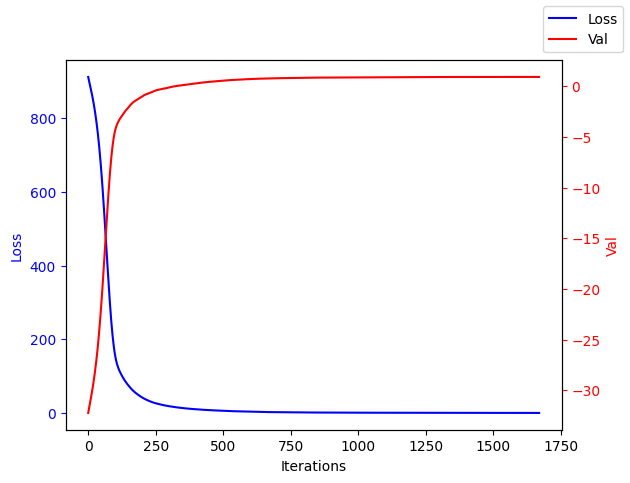

In [21]:
fig, ax1 = plt.subplots()

# Plot the first data set
ax1.plot(list(range(model.n_iter_)), model.loss_curve_, 'b-', label='Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

# Create the second axis
ax2 = ax1.twinx()

# Plot the second data set
ax2.plot(list(range(model.n_iter_)), model.validation_scores_, 'r-', label='Val')
ax2.set_ylabel('Val', color='r')
ax2.tick_params('y', colors='r')

# Add legend
fig.legend()

# Show the plot
plt.show()

### Evaluation Metrics

In [22]:
model.score(X_train, y_train)

0.9797290158047386

In [23]:
model.score(X_test, y_test)

0.8864259114309515

In [24]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"""
MAE: {mae:0.5f}
MSE: {mse:0.5f}
RMSE: {rmse:0.5f}
MAPE: {mape:0.5f}
""")


MAE: 1.55238
MSE: 4.60352
RMSE: 2.14558
MAPE: 0.03729

